In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('/content/mcdonalds.csv')

In [ ]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


# Expolatory Data analysis

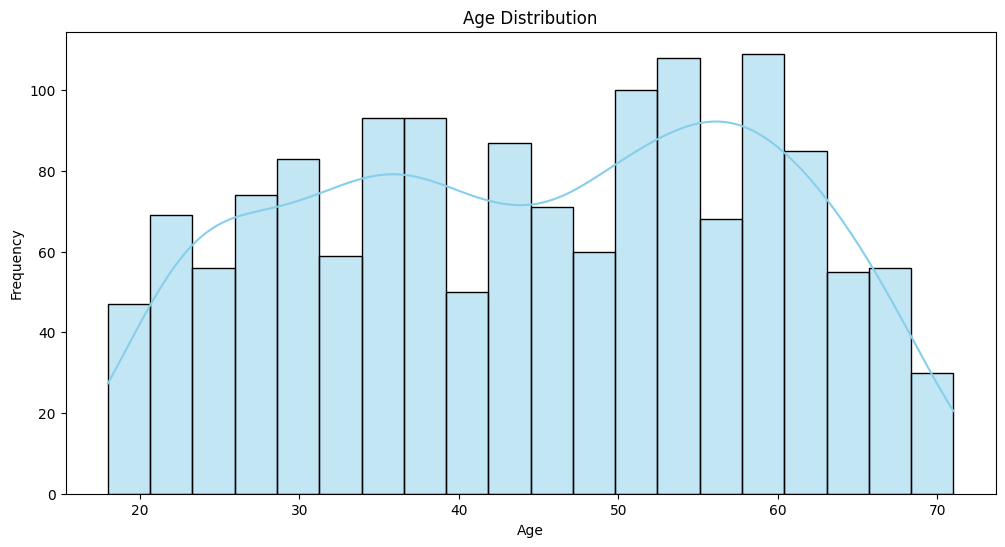

In [ ]:
# Age distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

 minimum age of approximately 45

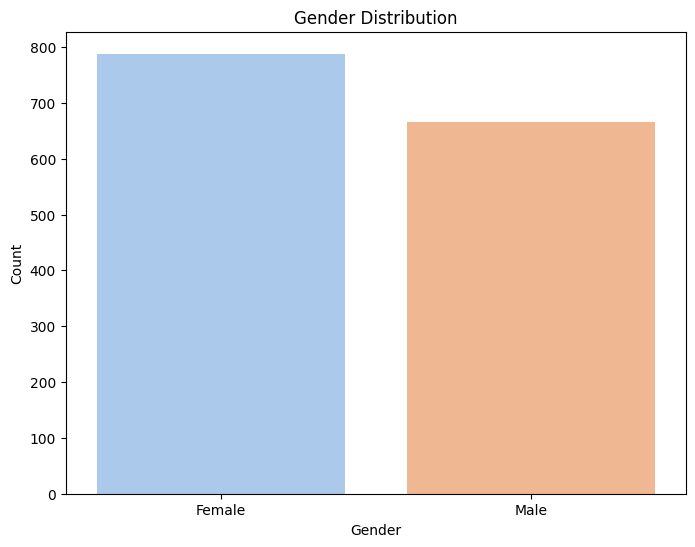

In [ ]:
# Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

female more than man

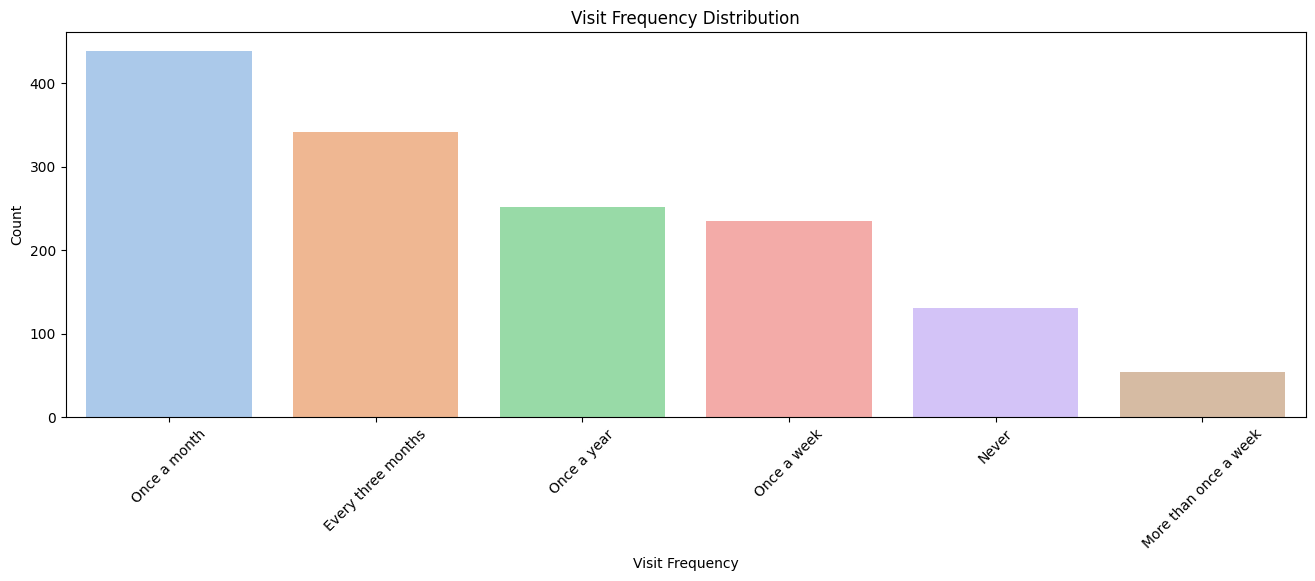

In [ ]:
# Visit frequency distribution
plt.figure(figsize=(16, 5))
sns.countplot(x='VisitFrequency', data=df, palette='pastel', order=df['VisitFrequency'].value_counts().index)
plt.title('Visit Frequency Distribution')
plt.xlabel('Visit Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

most of people visit once a month

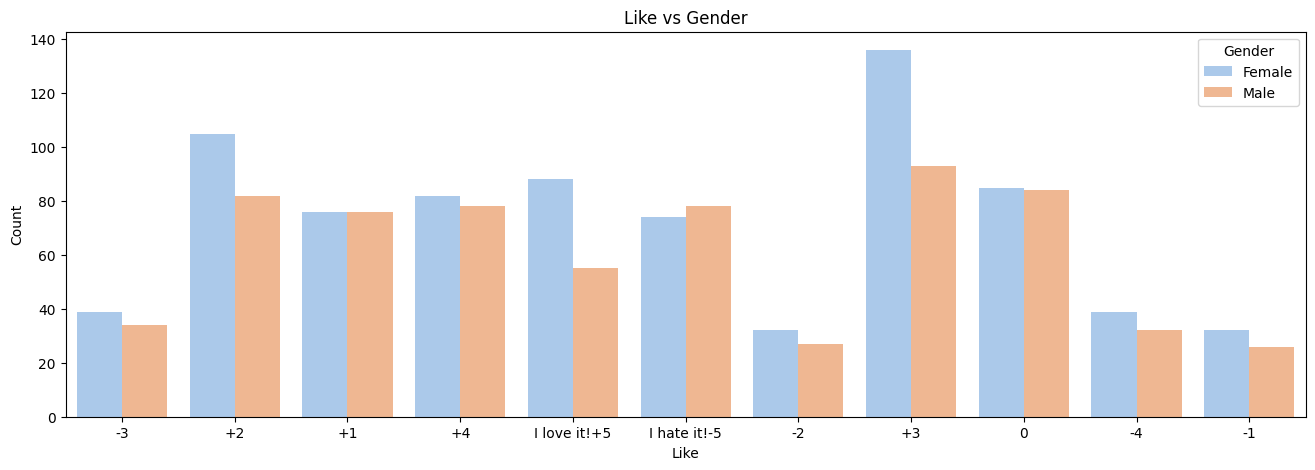

In [ ]:
# 'Like' vs Gender
plt.figure(figsize=(16, 5))
sns.countplot(x='Like', hue='Gender', data=df, palette='pastel')
plt.title('Like vs Gender')
plt.xlabel('Like')
plt.ylabel('Count')
plt.show()

girl like most and hate most

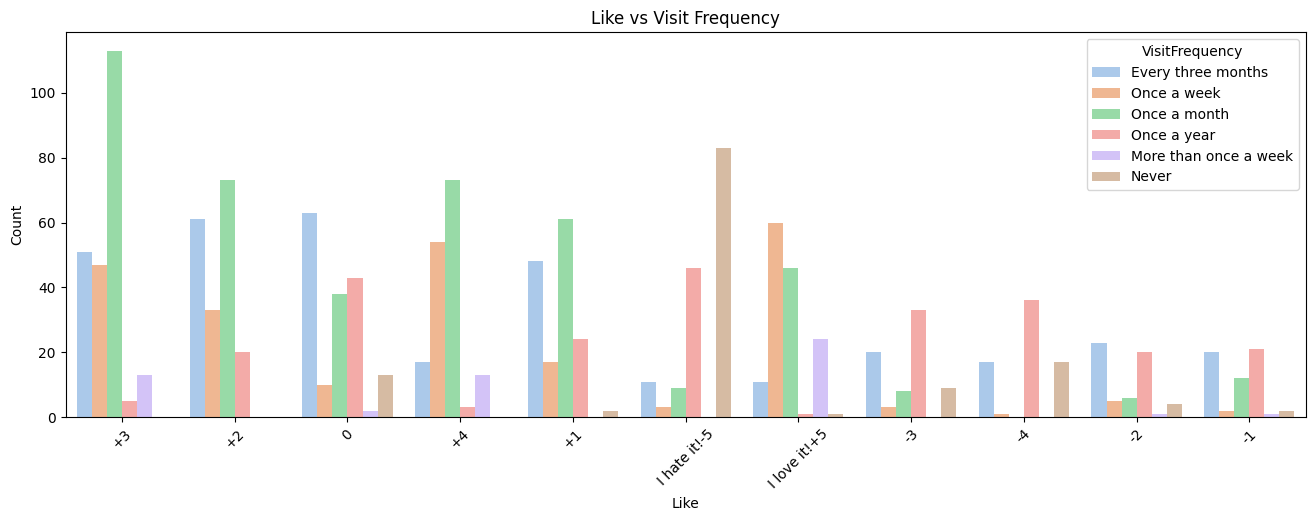

In [ ]:
# 'Like' vs Visit Frequency
plt.figure(figsize=(16, 5))
sns.countplot(x='Like', hue='VisitFrequency', data=df, palette='pastel', order=df['Like'].value_counts().index)
plt.title('Like vs Visit Frequency')
plt.xlabel('Like')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

"Once a week" tend to have more positive sentiments compared to those who visit less frequently.

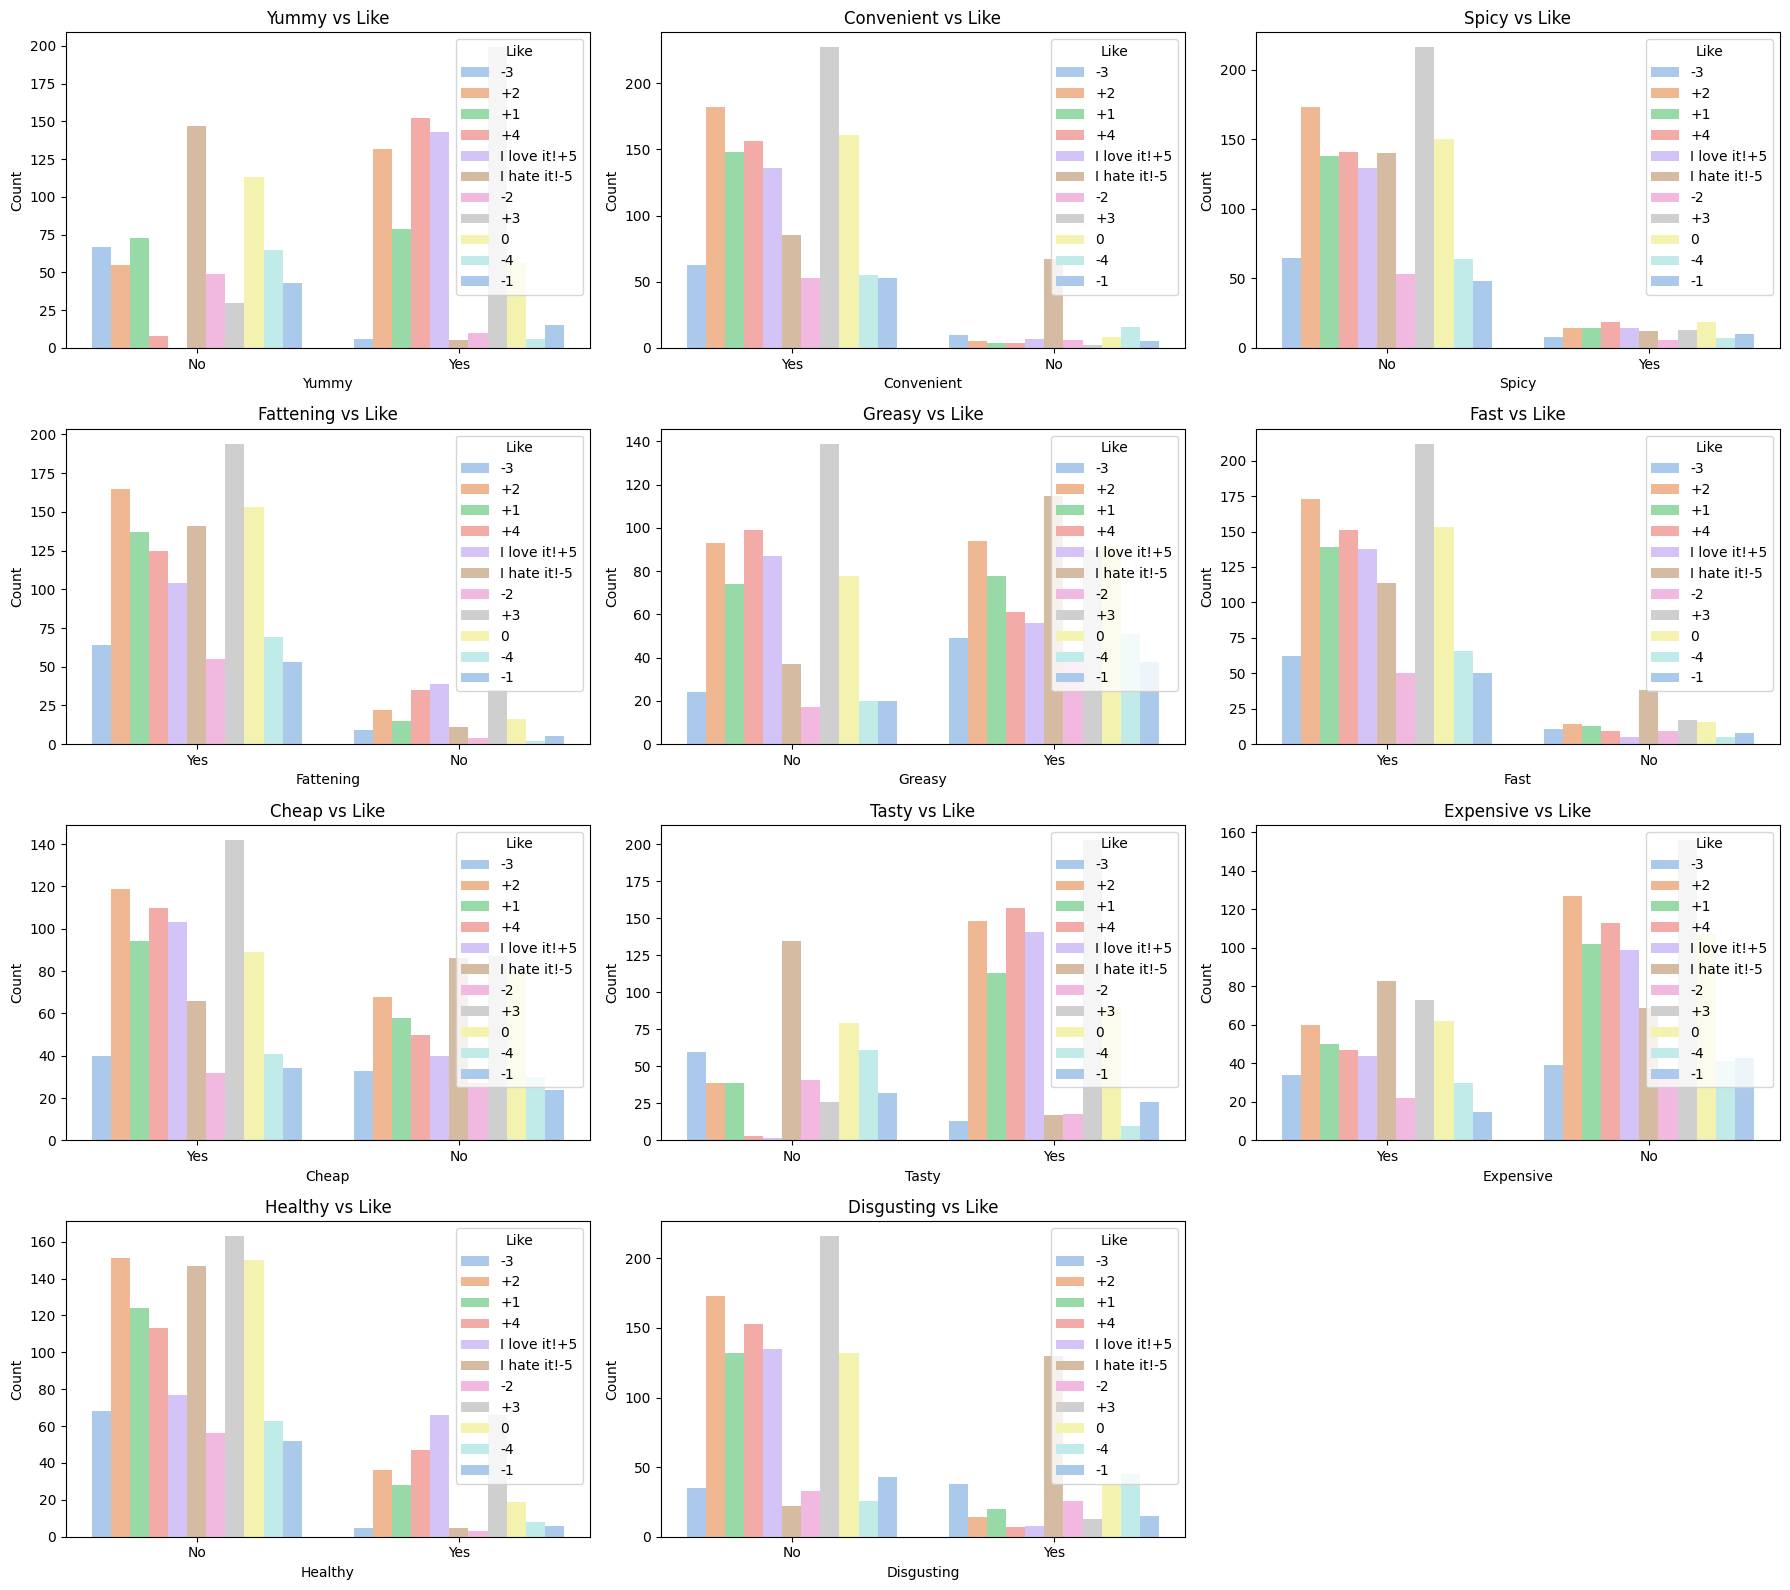

In [ ]:
# Define the preference columns
preference_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Plot preferences vs Like
plt.figure(figsize=(18, 16))
for i, column in enumerate(preference_columns, 1):
    plt.subplot(4, 3, i)
    sns.countplot(x=column, hue='Like', data=df, palette='pastel')
    plt.title(f'{column.capitalize()} vs Like')
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Like', loc='upper right')

plt.tight_layout()
plt.show()


# Converting Categorical Variables to Numerical

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


# Onehot Encoding

Demographic Data: Columns like 'Gender'.

Behavioral Data: Columns like 'VisitFrequency', 'Like'.

In [ ]:
categorical_columns = ['Gender', 'VisitFrequency', 'Like']
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_data = encoder.fit_transform(df[categorical_columns])

In [ ]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

In [ ]:
df = pd.concat([df.drop(columns = categorical_columns), encoded_df], axis=1)

In [ ]:
preference_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

for column in preference_columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0})

In [ ]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,...,Like_+2,Like_+3,Like_+4,Like_-1,Like_-2,Like_-3,Like_-4,Like_0,Like_I hate it!-5,Like_I love it!+5
0,0,1,0,1,0,1,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1,0,1,1,1,1,1,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,1,1,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0,1,1,1,1,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,0,1,1,1,1,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Preparing Data for Clustering

In [ ]:
preference_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

In [ ]:
# Encoded columns from the categorical variables (Gender, VisitFrequency, Like)
encoded_columns = [col for col in df.columns if col.startswith('Like_') or col.startswith('VisitFrequency_') or col.startswith('Gender_')]

In [ ]:
# Combine both lists
clustering_columns = preference_columns + encoded_columns

In [ ]:
clustering_columns

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Gender_Male',
 'VisitFrequency_More than once a week',
 'VisitFrequency_Never',
 'VisitFrequency_Once a month',
 'VisitFrequency_Once a week',
 'VisitFrequency_Once a year',
 'Like_+2',
 'Like_+3',
 'Like_+4',
 'Like_-1',
 'Like_-2',
 'Like_-3',
 'Like_-4',
 'Like_0',
 'Like_I hate it!-5',
 'Like_I love it!+5']

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[clustering_columns])

# Optimal Clustering:

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

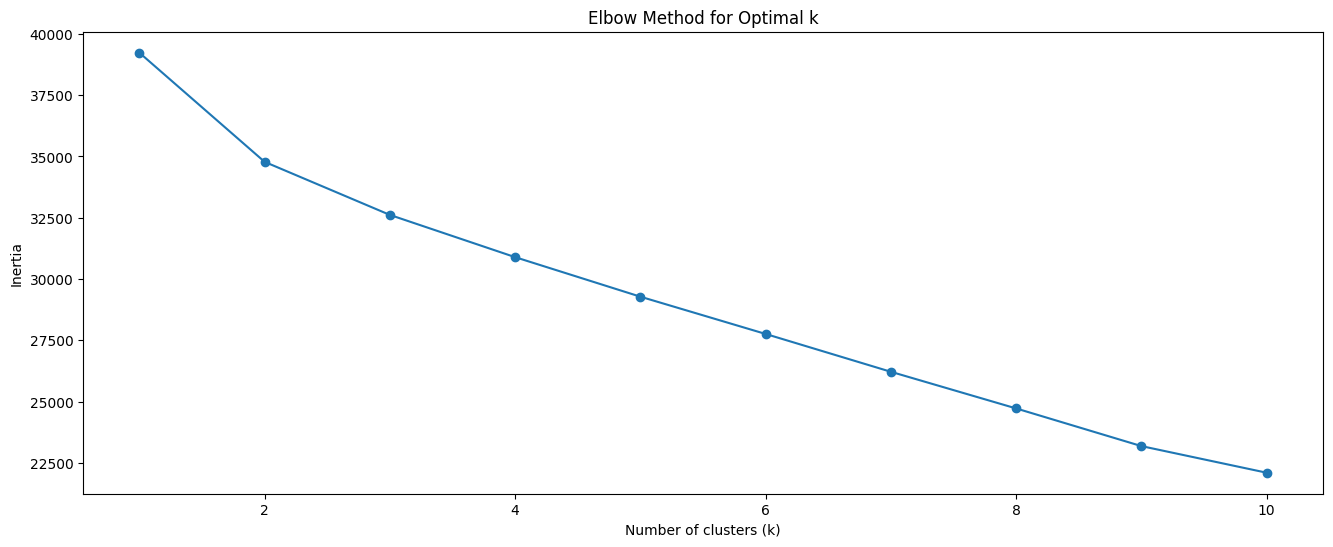

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

# Apply K-Means Clustering

In [ ]:
opimal_k = 2
kmeans = KMeans(n_clusters=opimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

In [ ]:
df['Cluster'].unique()

array([0, 1], dtype=int32)

In [ ]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,...,Like_+3,Like_+4,Like_-1,Like_-2,Like_-3,Like_-4,Like_0,Like_I hate it!-5,Like_I love it!+5,Cluster
0,0,1,0,1,0,1,1,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,1,1,0,1,1,1,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0,1,1,1,1,1,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1,1,0,1,1,1,1,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0,1,0,1,1,1,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# Analyze and Interpret the Results

In [ ]:
cluster_summary = df.groupby('Cluster').mean()

In [ ]:
print(cluster_summary)

            yummy  convenient     spicy  fattening    greasy      fast  \
Cluster                                                                  
0        0.053150    0.779528  0.094488   0.927165  0.712598  0.836614   
1        0.821164    0.976720  0.093122   0.834921  0.426455  0.934392   

            cheap     tasty  expensive   healthy  ...   Like_+2   Like_+3  \
Cluster                                           ...                       
0        0.496063  0.169291   0.448819  0.057087  ...  0.015748  0.003937   
1        0.653968  0.899471   0.308995  0.275132  ...  0.189418  0.240212   

          Like_+4   Like_-1   Like_-2   Like_-3   Like_-4    Like_0  \
Cluster                                                               
0        0.000000  0.070866  0.102362  0.141732  0.133858  0.181102   
1        0.169312  0.023280  0.007407  0.001058  0.003175  0.081481   

         Like_I hate it!-5  Like_I love it!+5  
Cluster                                        
0            

In [ ]:
cluster = kmeans.labels_

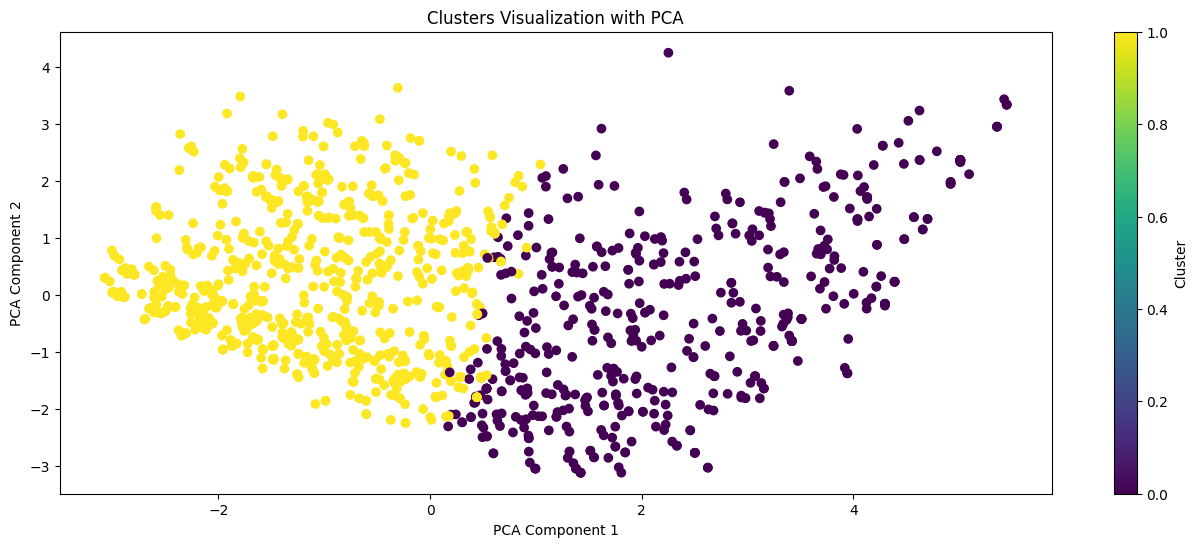

In [ ]:
# Reduce the dimensions for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plot the clusters
plt.figure(figsize=(16, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster, cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualization with PCA')
plt.colorbar(label='Cluster')
plt.show()